PROJET 5 : OPTIMISEZ LA GESTION DES DONNEES D'UNE BOUTIQUE 

# IMPORTATION DES LIBRAIRIES ET DES DONNEES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore 

In [2]:
erp = pd.read_excel('erp.xlsx')
web = pd.read_excel('web.xlsx')
liaison = pd.read_excel('liaison.xlsx')

C:\Users\BDS CREATIONS\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# EXPLORER LES FICHIERS

### Afficher l'en-tête avec df.head()

In [3]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


### Afficher toutes les informations avec df.info()

In [4]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


### Détecter les valeurs manquantes avec df.isnull().sum() ou df.isna().sum()

In [5]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [7]:
erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

### Fonction pour détecter les null : num_missing

In [8]:
def num_missing(x) : 
    return sum(x.isnull())

print(erp.apply(num_missing, axis = 0))

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


### Détecter les valeurs en double avec df.duplicated

In [9]:
erp.duplicated().sum()

0

### Fonction pour détecter les valeurs répétées : nb_occurences

In [10]:
def nb_occurences(x):
    return sum(x.duplicated())

print(erp.apply(nb_occurences, axis=0))

product_id          0
onsale_web        823
price             444
stock_quantity    697
stock_status      823
dtype: int64


### Fonction pour identifier le nb de valeurs uniques : val_unique

In [11]:
def val_unique(x):
    return (x.nunique())

print(erp.apply(val_unique, axis=0))

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64


### Fonction pour vérifier que la clé est unique : unicite_cle

In [12]:
def unicite_cle(x) : 
    if len(x.unique()) == (x.count()) : 
        print('La clé est unique.')
    else :
        print('la clé nest pas unique')

x = erp.product_id
    
unicite_cle(x)

La clé est unique.


## WEB

### Afficher l'en-tête avec df.head

In [13]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### Afficher toutes les informations avec df.info()


In [15]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

### Renommer une colonne df.rename


In [16]:
web.rename(columns={'sku' : 'id_web'}, inplace = True)

### Utilisation de la fonction unicite_cle pour vérifier  si la clé primaire est unique

In [17]:
x = web.id_web
unicite_cle(x)

la clé nest pas unique


### Utilisation de la fonction num_missing pour détecter les valeurs manquantes

In [18]:
print(web.apply(num_missing, axis=0))

id_web                     85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


### Traitement des valeurs manquantes

#### Afficher toutes les valeurs manquantes 

In [19]:
web_val_missing = web.loc[web['id_web'].isnull(),:]
web_val_missing

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print(web_val_missing.apply(num_missing, axis = 0))

# 85 id_web sont manquants

id_web                   85
virtual                   0
downloadable              0
rating_count              0
average_rating           83
total_sales              83
tax_status               83
tax_class                85
post_author              83
post_date                83
post_date_gmt            83
post_content             85
post_title               83
post_excerpt             83
post_status              83
comment_status           83
ping_status              83
post_password            85
post_name                83
post_modified            83
post_modified_gmt        83
post_content_filtered    85
post_parent              83
guid                     83
menu_order               83
post_type                83
post_mime_type           85
comment_count            83
dtype: int64


85 id_web sont null. Sur les 85 id_web null, nous avons 83 valeurs manquantes dans quasiment tous les autres champs. Etudions les 2 valeurs informées. 

In [21]:
web_val_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             2 non-null      object        
 13  post

In [22]:
web_val_missing.loc[web_val_missing['average_rating'].notnull(),:]
# voici les deux valeurs dont nous avons qq informations mais dont le id_web est nul

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Voici les deux valeurs dont certains champs sont renseignés. 

Que faire : 
   > - se rapprocher des collègues pour obtenir les informations manquantes,
   > - modifier le df dans le cas où les collègues nous renseignent,
   > - sans indications à propos de ces deux produits, créer un  nouveau DF sans ces datas mais garder le DF original que nous pourrons éventuellement modifier dans le cas où de nouvelles informations nous seraient transmises. 


#### Suppression des valeurs manquantes

In [23]:
web_withoutnull = web[web['id_web'].notnull()]

In [24]:
web_withoutnull.shape

(1428, 28)

In [25]:
x = web_withoutnull.id_web
unicite_cle(x)
# la clé n'est tjs pas unique malgré la suppression des null

la clé nest pas unique


In [26]:
print(web_withoutnull.apply(num_missing))

id_web                      0
virtual                     0
downloadable                0
rating_count                0
average_rating              0
total_sales                 0
tax_status                714
tax_class                1428
post_author                 0
post_date                   0
post_date_gmt               0
post_content             1428
post_title                  0
post_excerpt              714
post_status                 0
comment_status              0
ping_status                 0
post_password            1428
post_name                   0
post_modified               0
post_modified_gmt           0
post_content_filtered    1428
post_parent                 0
guid                        0
menu_order                  0
post_type                   0
post_mime_type            714
comment_count               0
dtype: int64


### Utilisation de la fonction nb_occurences pour détecter les valeurs répétées

In [27]:
print(web_withoutnull.apply(nb_occurences))

id_web                    714
virtual                  1427
downloadable             1427
rating_count             1427
average_rating           1427
total_sales              1387
tax_status               1426
tax_class                1427
post_author              1426
post_date                 714
post_date_gmt             714
post_content             1427
post_title                717
post_excerpt              750
post_status              1427
comment_status           1427
ping_status              1427
post_password            1427
post_name                 714
post_modified             841
post_modified_gmt         841
post_content_filtered    1427
post_parent              1427
guid                        0
menu_order               1427
post_type                1426
post_mime_type           1426
comment_count            1427
dtype: int64


### Traitement des valeurs dupliquées

In [28]:
web_val_duplicated = web_withoutnull.loc[web_withoutnull['id_web'].duplicated(),:]
web_val_duplicated.head()
# création d'un df avec les id_web dupliqués

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [29]:
web_val_duplicated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 799 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 714 non-null    object        
 1   virtual                714 non-null    int64         
 2   downloadable           714 non-null    int64         
 3   rating_count           714 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             0 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  po

In [30]:
web_val_duplicated.loc[web_val_duplicated['total_sales'].notnull(),:].head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [31]:
web_withoutnull.loc[web_withoutnull['id_web'] == 15298]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [32]:
web['post_type'].unique()

array(['product', nan, 'attachment'], dtype=object)

714 'id_web' sont dupliqués car ils correspondent à la description photo du produit.
Nous supprimons les valeurs correspondant aux images.

### Supprimer les valeurs dupliquées correspondant aux images

In [33]:
web_without_everything = web_withoutnull[web_withoutnull['post_type'] == 'product']

### Utilisation de la fonction unicite_cle pour vérifier si la clé id_web est unique

In [34]:
x = web_without_everything.id_web

unicite_cle(x)

La clé est unique.


In [35]:
web_without_everything.shape

(714, 28)

In [36]:
web_clean = web_without_everything

## DF LIAISON


### Afficher l'en-tête avec df.head()

In [37]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


### Afficher toutes les informations avec df.info()

In [38]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


### Utilisation de la fonction num_missing pour détecter les valeurs manquantes

In [39]:
print(liaison.apply(num_missing, axis = 0))

product_id     0
id_web        91
dtype: int64


#### Afficher les valeurs manquantes

In [40]:
liaison.loc[liaison['id_web'].isnull()]

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


### Utilisation de la fonction nb_occurences pour détecter les valeurs répétées

In [41]:
print(liaison.apply(nb_occurences))

product_id     0
id_web        90
dtype: int64


In [42]:
# Les valeurs dupliquées correspondent aux NaN.
# Nous les conservons.

In [43]:
x = liaison.product_id

unicite_cle(x)

La clé est unique.


# JOINDRE LES FICHIERS


La liste des product_id est exhaustive dans le fichier LIAISON, mais pas les références côté Web

## Première jointure entre LIAISON et ERP : merge_1

### Test de toutes les jointures afin de déterminer celle qui correspond le plus

> OUTER

In [44]:
merge_outer = pd.merge(liaison, erp, how ='outer', on = 'product_id', indicator = True)
merge_outer['_merge'].value_counts()

both          825
left_only       0
right_only      0
Name: _merge, dtype: int64

> INNER

In [45]:
merge_inner = pd.merge(liaison, erp, how ='inner', on = 'product_id', indicator = True)
merge_inner['_merge'].value_counts()

both          825
left_only       0
right_only      0
Name: _merge, dtype: int64

> RIGHT

In [46]:
merge_right = pd.merge(liaison, erp, how ='right', on = 'product_id', indicator = True)
merge_right['_merge'].value_counts()

both          825
left_only       0
right_only      0
Name: _merge, dtype: int64

> LEFT

In [47]:
merge_left = pd.merge(liaison, erp, how = 'left', on = 'product_id', indicator = True)
merge_left['_merge'].value_counts()

both          825
left_only       0
right_only      0
Name: _merge, dtype: int64

In [120]:
merge_1 = pd.merge(liaison, erp, how = 'inner', on = 'product_id', indicator = True)

In [121]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      825 non-null    int64   
 1   id_web          734 non-null    object  
 2   onsale_web      825 non-null    int64   
 3   price           825 non-null    float64 
 4   stock_quantity  825 non-null    int64   
 5   stock_status    825 non-null    object  
 6   _merge          825 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 46.1+ KB


In [122]:
merge_1.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,_merge
0,3847,15298,1,24.2,0,outofstock,both
1,3849,15296,1,34.3,0,outofstock,both
2,3850,15300,1,20.8,0,outofstock,both
3,4032,19814,1,14.1,0,outofstock,both
4,4039,19815,1,46.0,0,outofstock,both


In [123]:
print(merge_1.apply(num_missing, axis= 0))

product_id         0
id_web            91
onsale_web         0
price              0
stock_quantity     0
stock_status       0
_merge             0
dtype: int64


In [124]:
print(merge_1.apply(nb_occurences, axis = 0))

product_id          0
id_web             90
onsale_web        823
price             444
stock_quantity    697
stock_status      823
_merge            824
dtype: int64


In [125]:
x = merge_1['product_id']
unicite_cle(x)

La clé est unique.


## Deuxième jointure entre merge_1 et web_clean


### Test de toutes les jointures afin de déterminer celle qui correspond le plus

In [148]:
merge_1.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock


> OUTER

In [149]:
df_final_outer = pd.merge(merge_1, web_clean, how = 'outer', on = 'id_web', indicator = True)
df_final_outer['_merge'].value_counts()

both          714
left_only     111
right_only      0
Name: _merge, dtype: int64

> INNER

In [150]:
df_final_inner = pd.merge(merge_1, web_clean, how = 'left', on = 'id_web', indicator = True)
df_final_inner['_merge'].value_counts()

both          714
left_only     111
right_only      0
Name: _merge, dtype: int64

> LEFT

In [151]:
df_final_left = pd.merge(merge_1, web_clean, how = 'left', on = 'id_web', indicator = True)
df_final_left['_merge'].value_counts()

both          714
left_only     111
right_only      0
Name: _merge, dtype: int64

### Pourquoi sur les 825 lignes, seulement 714  correspondent ?
> Analysons les 111 lignes qui ne correspondent pas.

In [152]:
# Création d'un df avec les 111 valeurs afin de les analyser
left_only  = df_final_left[df_final_left['_merge']=='left_only']
left_only

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,NaN,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
49,4090,NaN,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
50,4092,NaN,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
119,4195,NaN,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
131,4209,NaN,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,7200,NaN,0,31.0,6,instock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
819,7201,NaN,0,31.0,18,instock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
820,7203,NaN,0,45.0,30,instock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
821,7204,NaN,0,45.0,9,instock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [153]:
# Sur les 111 valeurs, nous trouvons des NaN dans la colonne id_web. D'où la non-correspondance. Mais y a t-il que des NaN ?
left_only[left_only['id_web'].notnull()]

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
193,4289,13771,0,22.8,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
236,4568,15065,0,21.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
241,4584,14785,0,32.3,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
355,4741,12601,0,12.4,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
391,4864,15154,0,8.3,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
394,4869,14360,0,17.2,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
424,4921,15608,0,13.8,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
425,4922,15586,0,21.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
470,5018,15272,0,15.4,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
473,5021,15630,0,17.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


En réalisant une jointure ***outer***, ***inner*** ou ***left***, nous constatons que les 825 lignes ne correspondent pas entre les df. 
Seules 714 lignes correspondent et 111 lignes correspondent uniquement à gauche.

A quoi correspondent ces 111 données ?

Sur ces 111 données, 91 données ont un id_web null, elles ne peuvent donc pas corréler avec les valeurs de l'autre df.

Les 20 autres données ont un id_web mais ne correpondent pas au product_id.

Que faire :

> - Comme précedemment, se rapprocher des collègues en charge du référencement et obtenir si possible les informations nécessaires.
> - Si pas d'informations à apporter au df, réaliser la jointure à droite qui prendra en compte uniquement les 714 valeurs qui correpondent dans les 2 df.

> RIGHT

In [154]:
df_final_right = pd.merge(merge_1, web_clean, how = 'right', on = 'id_web', indicator = True)
df_final_right['_merge'].value_counts()

both          714
left_only       0
right_only      0
Name: _merge, dtype: int64

In [155]:
df_final = pd.merge(merge_1, web_clean, how = 'right', on = 'id_web', indicator = True)
df_final.shape

(714, 34)

In [156]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             714 non-null    int64         
 1   id_web                 714 non-null    object        
 2   onsale_web             714 non-null    int64         
 3   price                  714 non-null    float64       
 4   stock_quantity         714 non-null    int64         
 5   stock_status           714 non-null    object        
 6   virtual                714 non-null    int64         
 7   downloadable           714 non-null    int64         
 8   rating_count           714 non-null    int64         
 9   average_rating         714 non-null    float64       
 10  total_sales            714 non-null    float64       
 11  tax_status             714 non-null    object        
 12  tax_class              0 non-null      float64       
 13  post_

In [157]:
print(df_final.apply(num_missing))

product_id                 0
id_web                     0
onsale_web                 0
price                      0
stock_quantity             0
stock_status               0
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                714
post_author                0
post_date                  0
post_date_gmt              0
post_content             714
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            714
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    714
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           714
comment_count              0
_merge                     0
dtype: int64


In [158]:
print(df_final.apply(nb_occurences))

product_id                 0
id_web                     0
onsale_web               713
price                    352
stock_quantity           588
stock_status             712
virtual                  713
downloadable             713
rating_count             713
average_rating           713
total_sales              673
tax_status               713
tax_class                713
post_author              712
post_date                  0
post_date_gmt              0
post_content             713
post_title                 3
post_excerpt              37
post_status              713
comment_status           713
ping_status              713
post_password            713
post_name                  0
post_modified            127
post_modified_gmt        127
post_content_filtered    713
post_parent              713
guid                       0
menu_order               713
post_type                713
post_mime_type           713
comment_count            713
_merge                   713
dtype: int64


In [159]:
x = df_final.product_id
unicite_cle(x)

La clé est unique.


In [160]:
x = df_final.id_web
unicite_cle(x)

La clé est unique.


# CALCUL DU CA PAR PRODUIT ET TOTAL


In [161]:
df_ca = df_final[['product_id', 'id_web','onsale_web', 'price' ,'total_sales' ]]
df_ca.head()

,product_id,id_web,onsale_web,price,total_sales
0,4954,bon-cadeau-25-euros,1,25.0,10.0
1,3847,15298,1,24.2,6.0
2,3849,15296,1,34.3,0.0
3,3850,15300,1,20.8,0.0
4,4032,19814,1,14.1,3.0


### CA par produit

In [69]:
# WAY 1

for r, row in df_final.iterrows() : 
    df_ca.loc[r, 'ca_produit'] = (row['total_sales']*row['price'])
df_ca

C:\Users\BDS CREATIONS\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,product_id,id_web,onsale_web,price,total_sales,ca_produit
0,4954,bon-cadeau-25-euros,1,25.0,10.0,250.0
1,3847,15298,1,24.2,6.0,145.2
2,3849,15296,1,34.3,0.0,0.0
3,3850,15300,1,20.8,0.0,0.0
4,4032,19814,1,14.1,3.0,42.3
...,...,...,...,...,...,...
709,6930,16135,1,8.4,5.0,42.0
710,7023,15891,1,27.5,0.0,0.0
711,7025,15887,1,69.0,0.0,0.0
712,7247,13127-1,1,54.8,0.0,0.0


In [70]:
# WAY 2 

df_ca['ca_par_produit'] = df_ca['total_sales']*df_ca['price']
df_ca

C:\Users\BDSCRE~1\AppData\Local\Temp/ipykernel_12772/3195074523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['ca_par_produit'] = df_ca['total_sales']*df_ca['price']


,product_id,id_web,onsale_web,price,total_sales,ca_produit,ca_par_produit
0,4954,bon-cadeau-25-euros,1,25.0,10.0,250.0,250.0
1,3847,15298,1,24.2,6.0,145.2,145.2
2,3849,15296,1,34.3,0.0,0.0,0.0
3,3850,15300,1,20.8,0.0,0.0,0.0
4,4032,19814,1,14.1,3.0,42.3,42.3
...,...,...,...,...,...,...,...
709,6930,16135,1,8.4,5.0,42.0,42.0
710,7023,15891,1,27.5,0.0,0.0,0.0
711,7025,15887,1,69.0,0.0,0.0,0.0
712,7247,13127-1,1,54.8,0.0,0.0,0.0


### CA TOTAL

In [71]:
total_ca = df_ca['ca_produit'].sum()
total_ca

70568.6

Le chiffre d'affaires total est de ***70568.60 €***.

# MESURES DE TENDANCES CENTRALE

## Le mode

Un mode est une valeur ou un élément qui apparaît avec la fréquence la plus élevée.

In [128]:
df_final['price'].mode()

0    19.0
dtype: float64

Dans le champs 'price', la valeur la plus fréquente est 19€. 

## La moyenne 

In [129]:
prix_moyen = round(df_final['price'].mean(),2)
print('Une bouteille coûte en moyenne', (prix_moyen), 'euros')

Une bouteille coûte en moyenne 32.49 euros


## La médiane

In [74]:
prix_median = df_final['price'].median()
print ( '50% des prix des bouteilles sont inférieurs à ', (prix_median),'€ et les autres 50% sont supérieurs à ',
       (prix_median),'€.')

50% des prix des bouteilles sont inférieurs à  23.55 € et les autres 50% sont supérieurs à  23.55 €.


In [75]:
## La médiane n'est pas sensible aux valeurs extrêmes contrairement à la moyenne.

C:\Users\BDS CREATIONS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


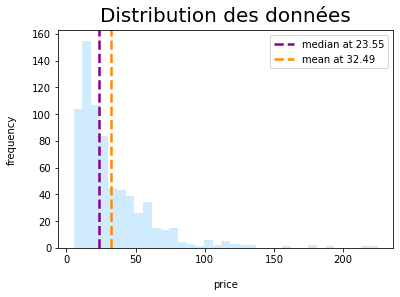

In [76]:
ax = sns.distplot(df_final['price'], kde=False, color='lightskyblue')
plt.title("Distribution des données", fontsize=20, y=1.012)
plt.xlabel("price", labelpad=15)
plt.ylabel("frequency", labelpad=15)
names = ["median", "mean"]
colors = ['darkmagenta', 'darkorange']
measurements = [prix_median, prix_moyen]
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

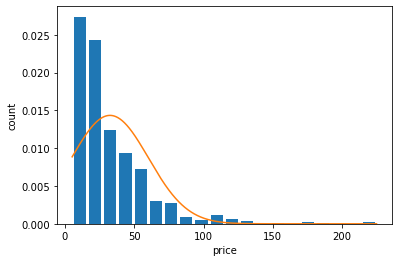

In [77]:
from scipy.stats import norm

plt.hist(df_final.price, bins=20, rwidth=0.8, density = True)
plt.xlabel('price')
plt.ylabel('count')

rng = np.arange(df_final.price.min(), df_final.price.max(), 0.1)
plt.plot(rng,norm.pdf(rng, df_final.price.mean(), df_final.price.std()))

# MESURES DE DISPERSION

## La variance empirique corrigée

La variance est la somme des différences à la moyenne au carré, divisée par l'effectif total.

In [78]:
df_final.price.var(ddof=0)

772.342067748669

- Plus la variance est élevée, plus les données dont dispersées, ce qui est le cas ici. 
- La variance (σ2) représente une quantité élevée au carré, ses unités sont également élevées au carré. C'est pourquoi la variance est difficile à utiliser dans la pratique. 
- Il est généralement plus facile d'interpréter l'écart type, car il utilise les mêmes unités que les données. 

## L'écart-type

- L'écart-type correspond à la racine carrée de la variance. 
- L'écart-type est dans la même unité de mesure que les données.
- L'écart type est la mesure de la dispersion des données par rapport à la moyenne.


In [79]:
df_final.price.std()

27.810524922323722

## Coefficient de variation 


- L'écart moyen absolu est similaire à la variance, à la différence que le calcul fait intervenir la valeur absolue plutôt que le passage au carré.
- Le coefficient de variation est une mesure de la répartition qui décrit la variation des données par rapport à la moyenne.

In [80]:
df_final.price.std(ddof=0)

27.791042941002935

# DETECTION DES OUTLIERS


In [81]:
df_final.describe()

,product_id,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,714.000000,714.0,714.000000,714.000000,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0
mean,5032.557423,1.0,32.493137,28.746499,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0
std,790.510878,0.0,27.810525,48.012608,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0
min,3847.000000,1.0,5.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,4280.250000,1.0,14.100000,2.000000,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,4796.000000,1.0,23.550000,12.000000,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,5710.500000,1.0,42.175000,35.000000,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,7338.000000,1.0,225.000000,578.000000,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


## Méthode 1 : L'écart interquartile

>L'écart interquartile est la différence entre le 3e quartile et le 1er quartile :
IQ=Q3−Q1

1/4 des valeurs se trouvent en dessous de **Q1** et 3/4 au-dessus ;

2/4 se trouvent en dessous de **Q2** , et 2/4 au-dessus ( ***Q2 est la médiane*** ) ;

3/4 se trouvent en dessous de **Q3** , et 1/4 au-dessus.

 Le Quartile **Q_1** correspond au quantile **Q_0.25** et le quartile **Q_3** correspond au quantile **Q_0.75**.
 
 Le Quantile **Q_0.5** correspond à  **la médiane**

### Calcul de Q1

In [87]:
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(df_final['price'], 25))
print("Quartile Q1 vaut : ", Q1)

Quartile Q1 vaut :  14


### Calcul de Q3

In [88]:
# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(df_final['price'], 75))
print("Quartile Q3 vaut : ", Q3)

Quartile Q3 vaut :  42


### Calcul de Q1 et Q3 > plus efficace

In [89]:
# Calcul de q1 et q3
quartile_1, quartile_3 = np.percentile(df_final.price,[25,75])
print('Le quartile 1 vaut ', round(quartile_1),'.')
print('Le quartile 3 vaut', round(quartile_3),'.')

Le quartile 1 vaut  14 .
Le quartile 3 vaut 42 .


### Calcul de l'écart interquartile

In [90]:
#L ecart interquartile est Q3 - Q1
IQ = Q3-Q1
print('Lécart interquartile est de', (IQ))

Lécart interquartile est de 28


### Déterminer les valeurs seuils

>Un point de données est tracé comme une valeur aberrante si sa valeur est inférieure à Q1-1,5(Q3-Q1) ou supérieure à Q3+ 1,5(Q3-Q1).

In [92]:
upper_bound_val = Q3 +(1.5*IQ)
lower_bound_val = Q1 -(1.5*IQ)
print('Le seuil au dela duquel les valeurs sont considérées comme aberrantes et/ou extrêmes est', upper_bound_val,'.')
print('Le seuil en dessous duquel les valeurs sont considérées comme aberrantes et/ou extrêmes est ',lower_bound_val,'.')

Le seuil au dela duquel les valeurs sont considérées comme aberrantes et/ou extrêmes est 84.0 .
Le seuil en dessous duquel les valeurs sont considérées comme aberrantes et/ou extrêmes est  -28.0 .


In [93]:
liste_outliers = df_final[(df_final.price>upper_bound_val) | (df_final.price<lower_bound_val)]

In [94]:
print('Selon la méthode des interquartiles, nous détectons', len(liste_outliers), 'valeurs aberrantes et/ou extrêmes.')

Selon la méthode des interquartiles, nous détectons 32 valeurs aberrantes et/ou extrêmes.


## Methode 2 : Boxplot ou Boîte à moustaches
Une représentation graphique intéressante pour représenter la dispersion d'une variable quantitative est la boîte à moustaches, ou boxplot. Cette dernière se construit à partir des différents quartiles.

> Les outliers correspondent à toutes les valeurs qui se situent en dehors des barrières. Les valeurs extérieures correspondent aux valeurs se situant entre les barrières intérieures et extérieures. Les valeurs lointaines se situent en dehors de la barrière extérieure.


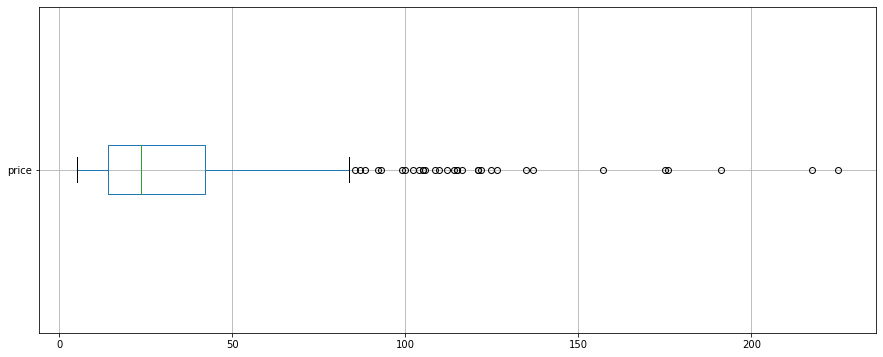

In [95]:
plt.figure(figsize=(15,6))
df_final.boxplot(column="price", vert=False)
plt.show()

## Méthode 3 : Z score

> Un z score  (également appelé score standard) nous donne une idée de la distance qui sépare un point de données de la moyenne. 
Mais plus techniquement, il s'agit d'une mesure du nombre d'écarts types en dessous ou au-dessus de la population.

- Pour utiliser un score z, il faut connaître la moyenne μ et l’écart-type de la population σ.
- Les z scores vont de -3 écarts-types (qui tomberaient à l'extrême gauche de la courbe de distribution normale) à +3 écarts-types (qui tomberaient à l'extrême droite de la courbe de distribution normale).

L'équation du z score est : 

z = (x – μ)/σ soit z = (x - moyenne)/écart-type

In [130]:
outliers_zscore = []
def detect_outliers(x) : 
    
    threshold=2
    mean = np.mean(x)
    std = np.std(x)
    
    for i in x :
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers_zscore.append(i)
    return outliers_zscore

In [131]:
list_outliers_zscore = detect_outliers(df_final.price)
list_outliers_zscore

[100.0,
 88.4,
 225.0,
 126.5,
 176.0,
 108.5,
 157.0,
 104.0,
 109.6,
 102.3,
 137.0,
 217.5,
 105.0,
 105.0,
 112.0,
 92.0,
 124.8,
 175.0,
 191.3,
 93.0,
 122.0,
 114.0,
 135.0,
 105.6,
 116.4,
 115.0,
 121.0,
 99.0,
 115.0,
 121.0]

In [132]:
print('Avec la méthode du Z score, nous détectons', len(list_outliers_zscore), 'valeurs aberrantes et/ou extrêmes.')

Avec la méthode du Z score, nous détectons 30 valeurs aberrantes et/ou extrêmes.


## Méthode 4 : Scatter plot ou nuage de points

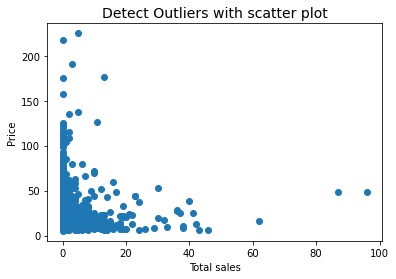

In [96]:
plt.scatter(df_final.total_sales, df_final.price)
plt.xlabel('Total sales')
plt.ylabel('Price')
plt.title('Detect Outliers with scatter plot', fontsize = 14);

## Liste des outliers

Les outliers correspondent à toutes les valeurs qui se situent en dehors des barrières. Les valeurs extérieures correspondent aux valeurs se situant entre les barrières intérieures et extérieures. Les valeurs lointaines se situent en dehors de la barrière extérieure.

In [133]:
outliers_iq = df_final[df_final.price >= Q3 +(1.5*IQ)][['price', 'id_web','product_id','post_name' ]].sort_values(by='price', ascending = False)
outliers_iq

,price,id_web,product_id,post_name
200,225.0,15940,4352,champagne-egly-ouriet-grand-cru-millesime-2008
426,217.5,14581,5001,david-duband-charmes-chambertin-grand-cru-2014
587,191.3,14983,5892,coteaux-champenois-egly-ouriet-ambonnay-rouge-...
219,176.0,3510,4402,cognac-frapin-vip-xo
553,175.0,15185,5767,camille-giroud-clos-de-vougeot-2016
222,157.0,7819,4406,cognac-frapin-chateau-de-fontpinot-1989-20-ans
382,137.0,14220,4904,domaine-des-croix-corton-charlemagne-grand-cru...
642,135.0,14923,6126,champagne-gosset-celebris-vintage-2007
202,126.5,12589,4355,champagne-egly-ouriet-grand-cru-brut-blanc-de-...
511,124.8,14915,5612,domaine-weinbach-gewurztraminer-gc-furstentum-...


## REPRESENTATION GRAPHIQUE DES PRIX DES PRODUITS

<function matplotlib.pyplot.show(close=None, block=None)>

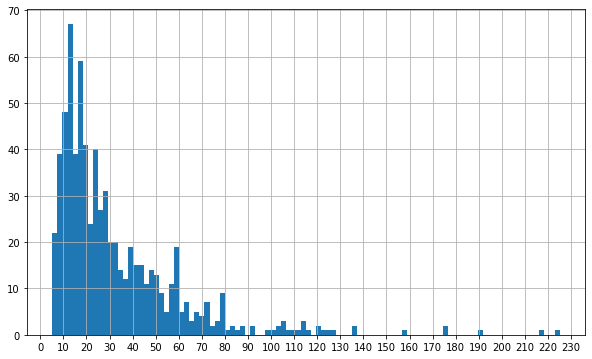

In [98]:
plt.figure(figsize=(10,6))
df_final['price'].hist(bins=100)
plt.xticks([10*i for i in range(24)])
plt.show

# LES MESURES DE FORME


## Le Skewness et le Kurtosis empirique


### Le skewness
>Le skewness est une mesure d'asymétrie. 
L’asymétrie est une méthode numérique statistique pour mesurer l’asymétrie de la distribution ou de l’ensemble de données. 
Il indique la position de la majorité des valeurs de données dans la distribution autour de la valeur moyenne.


In [100]:
skew = df_final.price.skew()
skew

2.5809012630033705

 > Si le coefficient d’asymétrie est supérieur à 0, comme c'est le cas ici, alors le graphique est dit positivement
    asymétrique avec la majorité des valeurs de données inférieures à la moyenne. La plupart des valeurs sont concentrées 
    sur le côté gauche du graphique.

### Le Kurtosis
> Kurtosis est une méthode numérique en statistique qui mesure la netteté du pic dans la distribution des données.

In [102]:
kurtosis = df_final.price.kurtosis()
kurtosis

10.088392064977292

> Si le coefficient d’aplatissement est supérieur à 3, comme c'est le cas ici,  alors la distribution des données est leptokurtique et montre un pic net sur le graphique.

Skewness: 2.580901
Kurtosis: 10.088392


C:\Users\BDS CREATIONS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


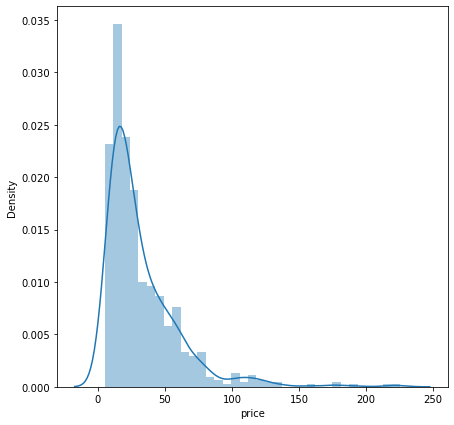

In [103]:
plt.figure(figsize=(7, 7))
sns.distplot( df_final['price'])
print("Skewness: %f" % df_final['price'].skew())
print("Kurtosis: %f" % df_final['price'].kurt())

Inclinaison positive : 
Le graphique est dit positivement asymétrique avec la majorité des valeurs de données inférieures à la moyenne.
Ici on parle de distribution positive ou asymétrique à droite
